# Prime decomposition
--- 

### Documentation
https://en.wikipedia.org/wiki/Integer_factorization

## Primality test

1. This holds true for all n: all divisors are less than or equal to n/2
2. This holds true for all n: all unique divisors of n are numbers less than or equal to √n  

In [137]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import time

mpl.rcParams['figure.figsize'] = (16, 9)
mpl.rcParams['axes.grid'] = False

In [138]:
def is_prime(n: int) -> bool:
    """Primality test using 6k+-1 optimization."""
    if n <= 3:
        return n > 1
    if not n%2 or not n%3:
        return False
    i = 5
    stop = int(n**0.5)
    while i <= stop:
        if not n%i or not n%(i + 2):
            return False
        i += 6
    return True

In [139]:
roof = 100
primes = [x if is_prime(x) else 0 for x in np.arange(0, roof,1) ]


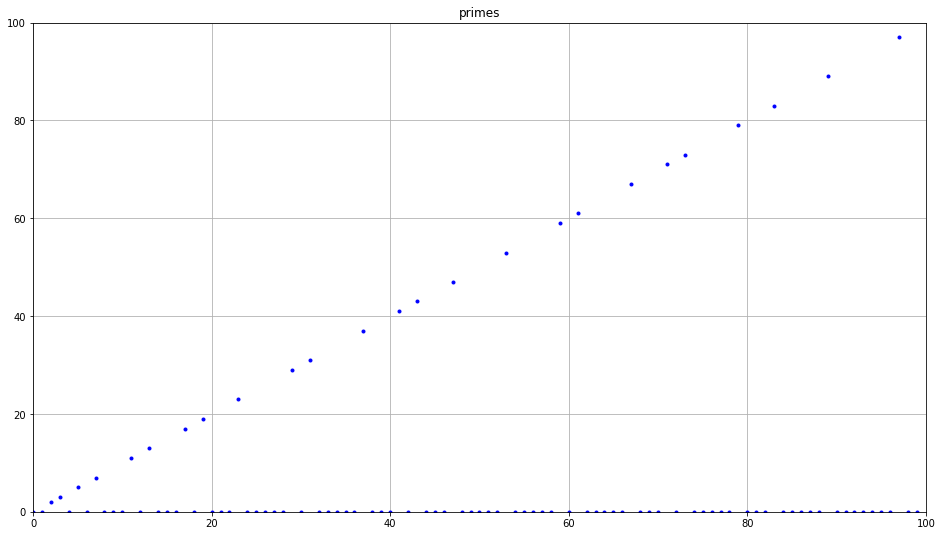

In [140]:
plt.title("primes")
plt.plot(primes,'.b')
plt.grid('-')
plt.xlim([0, roof])
plt.ylim([0, roof])
plt.show()

### Trial division

In [141]:
primes = [x for x in np.arange(0, 100,1) if is_prime(x) ]

In [142]:
def trial_division(n: int) -> list[int]:
    """Return a list of the prime factors for a natural number."""
    a = []               # Prepare an empty list.
    f = 2                # The first possible factor.    
    while n > 1:         # While n still has remaining factors...
        if n % f == 0:   # The remainder of n divided by f might be zero.        
            a.append(f)  # If so, it divides n. Add f to the list.
            n //= f       # Divide that factor out of n.
        else:            # But if f is not a factor of n,
            f += 1       # Add one to f and try again.
    return a             # Prime factors may be repeated: 12 factors to 2,2,3.

In [143]:
def trial_division_opti(n: int) -> list[int]:
    a = []
    while n % 2 == 0:
        a.append(2)
        n //= 2
    f = 3
    while f * f <= n:
        if n % f == 0:
            a.append(f)
            n //= f
        else:
            f += 2
    if n != 1: a.append(n)
    # Only odd number is possible
    return a

In [177]:
from ttictoc import tic,toc

In [186]:
tic()
print(trial_division(98215137244))

print(toc())

[2, 2, 7, 7, 7, 137, 522521]
0.022916500001883833


In [185]:
tic()

print(trial_division_opti(982151372445))

print(toc())

[3, 5, 29, 2257819247]
0.0018536999996285886


### Wheel factorization